In [1]:
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Data Load

In [2]:
train = pd.read_csv('train.csv', index_col="PassengerId")

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Seaborn

### countplot

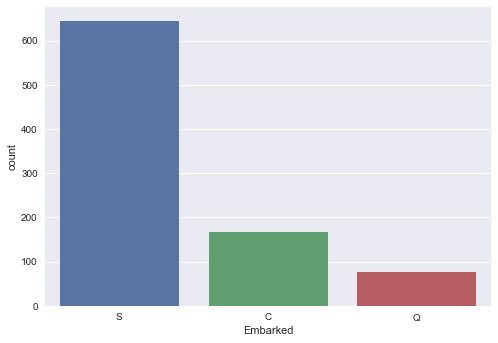

In [3]:
sns.countplot(data=train, x="Embarked")

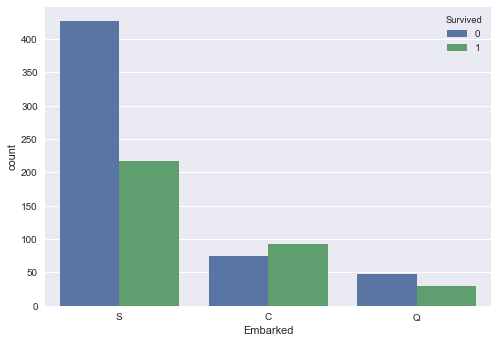

In [4]:
sns.countplot(data=train, x="Embarked", hue="Survived")

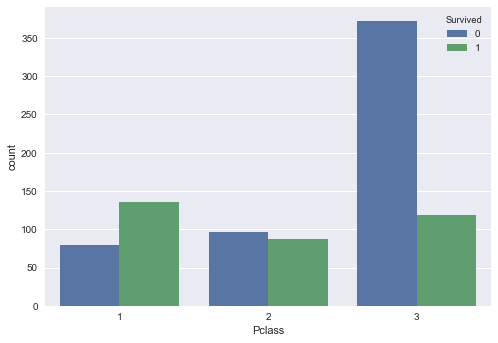

In [5]:
sns.countplot(data=train, x="Pclass", hue="Survived")

### Barplot

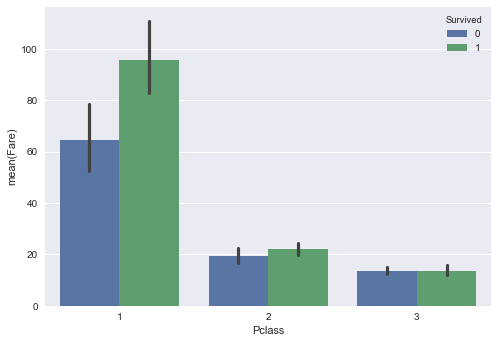

In [6]:
sns.barplot(data=train, x="Pclass", y="Fare", hue="Survived")

### distplot

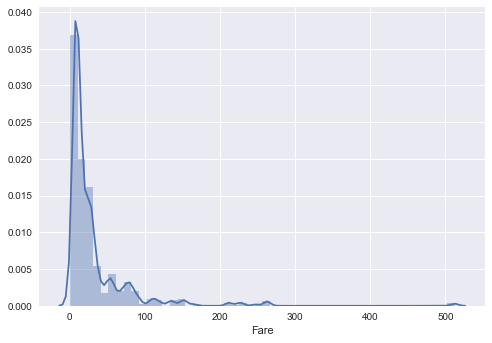

In [12]:
sns.distplot(train["Fare"])

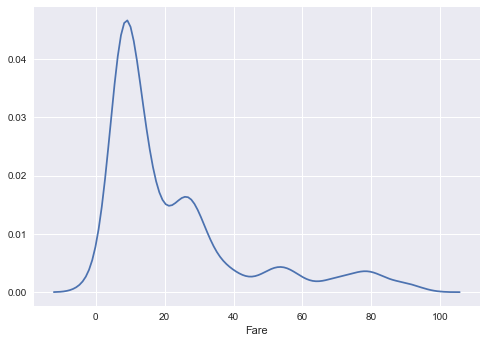

In [9]:
ingnore_high_fare = train[train["Fare"] < 100]
sns.distplot(ingnore_high_fare["Fare"], hist=False)

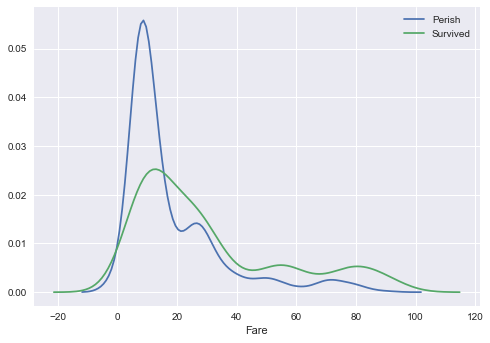

In [11]:
ingnore_high_fare = train[train["Fare"] < 100]
perish = ingnore_high_fare[ingnore_high_fare['Survived'] == 0]
survived = ingnore_high_fare[ingnore_high_fare['Survived'] == 1]

sns.distplot(perish["Fare"], hist = False, label="Perish")
sns.distplot(survived["Fare"], hist = False, label="Survived")

## Lmplot

In [ ]:
sns.lmplot(data=train, x="Age", y="Fare", fit_reg=False, hue="Survived")

In [ ]:
ingnore_high_fare = train[train["Fare"] < 100]
sns.lmplot(data = ingnore_high_fare, x="Age", y= "Fare", hue= "Survived", fit_reg=False)

### subplots

In [ ]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.countplot(data=train, x="Pclass", hue="Survived", ax=ax1)
sns.countplot(data=train, x="Sex", hue="Survived", ax=ax2)
sns.countplot(data=train, x="Embarked", hue="Survived", ax=ax3)
sns.countplot(data=train, x="SibSp", hue="Survived", ax=ax4)
sns.countplot(data=train, x="Parch", hue="Survived", ax=ax5)
# sns.countplot(data=train, x="Embarked", hue="Survived", ax=ax6)


In [ ]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 8)

sns.countplot(data=train, x="SibSp", ax=ax)

In [15]:
def find_title(name):
    return name.split(", ")[1].split(". ")[0]

train["Title"] = train["Name"].apply(find_title)
print(train.shape)
train[["Name", "Title"]]

(891, 12)


,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr
6,"Moran, Mr. James",Mr
7,"McCarthy, Mr. Timothy J",Mr
8,"Palsson, Master. Gosta Leonard",Master
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs


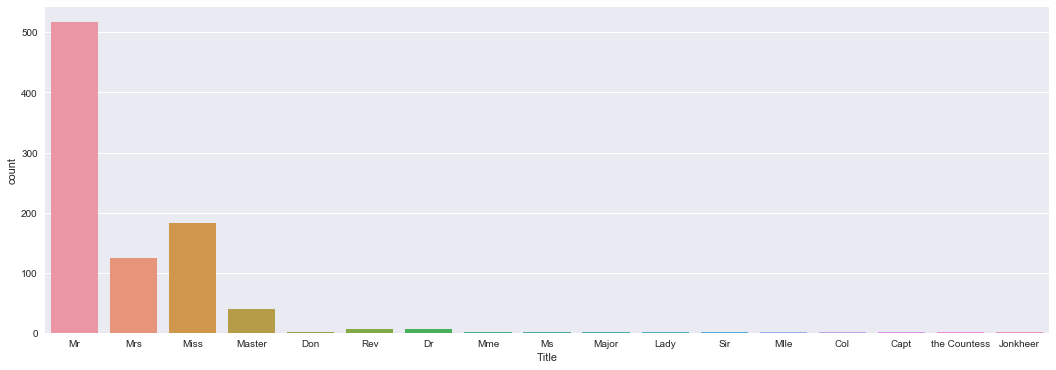

In [18]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,6)

sns.countplot(data=train, x="Title")